## Logistic Regression for MNIST Digit Classification

-  Build a logistic regression model for MNIST
- Evaluate model performance using multiple metrics
- Fine-tune hyperparameters using grid search
- Visualize decision boundaries

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from sklearn.model_selection import GridSearchCV

In [3]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

train_dataset = torchvision.datasets.MNIST(root='../data', train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.MNIST(root='../data', train=False, transform=transform, download=True)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

In [4]:
class LogisticRegression(nn.Module):
    def __init__(self, input_dim, num_classes):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(input_dim, num_classes)
    
    def forward(self, x):
        x = x.view(x.size(0), -1)
        return self.linear(x)

input_dim = 28 * 28
num_classes = 10
model = LogisticRegression(input_dim, num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

In [5]:
def train(model, train_loader, criterion, optimizer, num_epochs):
    model.train()
    for epoch in range(num_epochs):
        running_loss = 0.0
        for i, (images, labels) in enumerate(train_loader):
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item()
            if (i+1) % 100 == 0:
                print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_loader)}], Loss: {running_loss/100:.4f}')
                running_loss = 0.0

num_epochs = 50
train(model, train_loader, criterion, optimizer, num_epochs)

Epoch [1/50], Step [100/938], Loss: 0.5689
Epoch [1/50], Step [200/938], Loss: 0.3929
Epoch [1/50], Step [300/938], Loss: 0.3428
Epoch [1/50], Step [400/938], Loss: 0.3514
Epoch [1/50], Step [500/938], Loss: 0.3238
Epoch [1/50], Step [600/938], Loss: 0.3588
Epoch [1/50], Step [700/938], Loss: 0.3198
Epoch [1/50], Step [800/938], Loss: 0.3152
Epoch [1/50], Step [900/938], Loss: 0.3180
Epoch [2/50], Step [100/938], Loss: 0.3007
Epoch [2/50], Step [200/938], Loss: 0.3152
Epoch [2/50], Step [300/938], Loss: 0.3206
Epoch [2/50], Step [400/938], Loss: 0.2941
Epoch [2/50], Step [500/938], Loss: 0.3050
Epoch [2/50], Step [600/938], Loss: 0.3036
Epoch [2/50], Step [700/938], Loss: 0.3020
Epoch [2/50], Step [800/938], Loss: 0.3051
Epoch [2/50], Step [900/938], Loss: 0.3290
Epoch [3/50], Step [100/938], Loss: 0.2941
Epoch [3/50], Step [200/938], Loss: 0.2747
Epoch [3/50], Step [300/938], Loss: 0.3203
Epoch [3/50], Step [400/938], Loss: 0.3103
Epoch [3/50], Step [500/938], Loss: 0.3147
Epoch [3/50

In [6]:
def evaluate(model, test_loader):
    model.eval()
    predictions = []
    true_labels = []
    
    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            predictions.extend(predicted.numpy())
            true_labels.extend(labels.numpy())
    
    accuracy = accuracy_score(true_labels, predictions)
    precision, recall, f1, _ = precision_recall_fscore_support(true_labels, predictions, average='weighted')
    
    return accuracy, precision, recall, f1

accuracy, precision, recall, f1 = evaluate(model, test_loader)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.9230
Precision: 0.9232
Recall: 0.9230
F1 Score: 0.9229


In [7]:
learning_rates = [0.001, 0.01, 0.1]
momentum_values = [0.8, 0.9, 0.95]
best_accuracy = 0
best_params = {}

for lr in learning_rates:
    for momentum in momentum_values:
        model = LogisticRegression(input_dim, num_classes)
        optimizer = optim.SGD(model.parameters(), lr=lr, momentum=momentum)
        
        train(model, train_loader, criterion, optimizer, num_epochs=2)
        
        accuracy, _, _, _ = evaluate(model, test_loader)
        print(f"LR: {lr}, Momentum: {momentum}, Accuracy: {accuracy:.4f}")
        
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_params = {'lr': lr, 'momentum': momentum}

print(f"\nBest parameters: {best_params}")
print(f"Best accuracy: {best_accuracy:.4f}")

Epoch [1/2], Step [100/938], Loss: 1.3033
Epoch [1/2], Step [200/938], Loss: 0.6792
Epoch [1/2], Step [300/938], Loss: 0.5759
Epoch [1/2], Step [400/938], Loss: 0.4931
Epoch [1/2], Step [500/938], Loss: 0.4729
Epoch [1/2], Step [600/938], Loss: 0.4709
Epoch [1/2], Step [700/938], Loss: 0.4284
Epoch [1/2], Step [800/938], Loss: 0.4106
Epoch [1/2], Step [900/938], Loss: 0.4079
Epoch [2/2], Step [100/938], Loss: 0.3912
Epoch [2/2], Step [200/938], Loss: 0.3704
Epoch [2/2], Step [300/938], Loss: 0.3738
Epoch [2/2], Step [400/938], Loss: 0.3892
Epoch [2/2], Step [500/938], Loss: 0.3578
Epoch [2/2], Step [600/938], Loss: 0.3614
Epoch [2/2], Step [700/938], Loss: 0.3547
Epoch [2/2], Step [800/938], Loss: 0.3784
Epoch [2/2], Step [900/938], Loss: 0.3546
LR: 0.001, Momentum: 0.8, Accuracy: 0.9069
Epoch [1/2], Step [100/938], Loss: 1.0223
Epoch [1/2], Step [200/938], Loss: 0.5210
Epoch [1/2], Step [300/938], Loss: 0.4628
Epoch [1/2], Step [400/938], Loss: 0.4298
Epoch [1/2], Step [500/938], Loss

C:\Users\Asus\AppData\Local\Temp\ipykernel_2300\2718811364.py:3: RuntimeWarning: overflow encountered in scalar subtract
  x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
C:\Users\Asus\AppData\Local\Temp\ipykernel_2300\2718811364.py:4: RuntimeWarning: overflow encountered in scalar subtract
  y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
C:\Users\Asus\AppData\Local\Temp\ipykernel_2300\2718811364.py:5: RuntimeWarning: overflow encountered in scalar subtract
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))


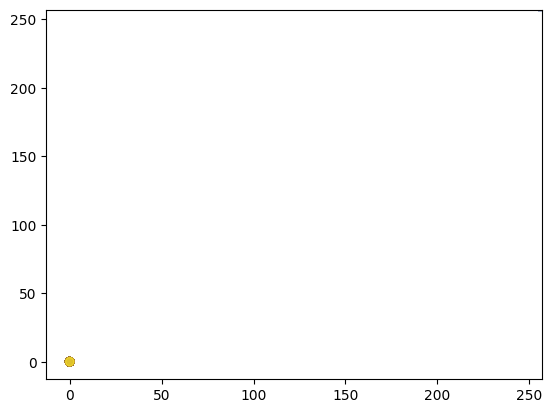

In [8]:
def plot_decision_boundary(model, X, y):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = model(torch.FloatTensor(np.c_[xx.ravel(), yy.ravel()]))
    Z = torch.argmax(Z, dim=1).reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)
    plt.show()

mask = (train_dataset.targets < 2)
X = train_dataset.data[mask].numpy().reshape(-1, 784)[:, :2]
y = train_dataset.targets[mask].numpy()

simple_model = LogisticRegression(2, 2)
simple_optimizer = optim.SGD(simple_model.parameters(), lr=0.01, momentum=0.9)

plot_decision_boundary(simple_model, X, y)